In [3]:
import pandas as pd
file_path = 'team_stats_2014_2023.csv'
team_stats_df = pd.read_csv(file_path)
team_stats_df.head(), team_stats_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23958 entries, 0 to 23957
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     23958 non-null  int64  
 1   game_id  23958 non-null  int64  
 2   Team     23958 non-null  object 
 3   MP       23958 non-null  int64  
 4   FG       23958 non-null  float64
 5   FGA      23958 non-null  float64
 6   FGp      23958 non-null  float64
 7   3P       23958 non-null  float64
 8   3PA      23958 non-null  float64
 9   3Pp      23958 non-null  float64
 10  FT       23958 non-null  float64
 11  FTA      23958 non-null  float64
 12  FTp      23958 non-null  float64
 13  ORB      23958 non-null  float64
 14  DRB      23958 non-null  float64
 15  TRB      23958 non-null  float64
 16  AST      23958 non-null  float64
 17  STL      23958 non-null  float64
 18  BLK      23958 non-null  float64
 19  TOV      23958 non-null  float64
 20  PF       23958 non-null  float64
 21  PTS      239

(   Year       game_id Team   MP    FG   FGA    FGp    3P   3PA    3Pp  ...  \
 0  2014  131410290001  ORL  240  36.0  93.0  0.387   9.0  19.0  0.474  ...   
 1  2014  131410290001  IND  240  34.0  71.0  0.479   7.0  17.0  0.412  ...   
 2  2014  131410290002  CHI  240  35.0  83.0  0.422   7.0  26.0  0.269  ...   
 3  2014  131410290002  MIA  240  37.0  72.0  0.514  11.0  20.0  0.550  ...   
 4  2014  131410290003  LAC  240  41.0  83.0  0.494   8.0  21.0  0.381  ...   
 
    DRBp  TRBp  ASTp  STLp  BLKp  TOVp   USGp   ORtg   DRtg  BPM  
 0  72.2  47.0  47.2  10.5  11.1  14.9  100.0   91.6  102.1  NaN  
 1  72.3  53.0  50.0   4.2  24.3  19.0  100.0  102.1   91.6  NaN  
 2  85.7  50.6  65.7  11.3   7.7  16.2  100.0   97.9  110.2  NaN  
 3  76.1  49.4  70.3  10.3  12.3  17.5  100.0  110.2   97.9  NaN  
 4  62.5  43.5  65.9  11.0   6.3  14.7  100.0  102.6  115.6  NaN  
 
 [5 rows x 38 columns],
 None)

In [7]:
# Selecting the relevant columns for analysis
columns_of_interest = ['eFGp', '3PAr', 'FTr', 'ORBp', 'DRBp', 'TRBp', 
                       'ASTp', 'STLp', 'BLKp', 'TOVp', 'ORtg', 'DRtg']

# Generating summary statistics for these columns
summary_stats = team_stats_df[columns_of_interest].describe()

summary_stats


,eFGp,3PAr,FTr,ORBp,DRBp,TRBp,ASTp,STLp,BLKp,TOVp,ORtg,DRtg
count,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000,23958.000000
mean,0.521198,0.338029,0.267230,23.326939,76.674142,50.000910,59.203260,7.837278,8.439298,12.327344,110.342145,110.342145
std,0.066849,0.091487,0.094041,7.355969,7.356053,5.278313,9.939325,2.930446,4.257830,3.412487,11.703545,11.703545
min,0.285000,0.045000,0.011000,0.000000,44.200000,29.300000,20.000000,0.000000,0.000000,1.000000,68.200000,68.200000
25%,0.475000,0.274000,0.200000,18.200000,71.700000,46.500000,52.600000,5.700000,5.500000,9.900000,102.400000,102.400000
50%,0.519000,0.337000,0.258000,23.100000,76.900000,50.000000,59.500000,7.600000,8.000000,12.200000,110.300000,110.300000
75%,0.565000,0.400000,0.325000,28.300000,81.800000,53.500000,65.900000,9.700000,11.100000,14.500000,118.200000,118.200000
max,0.795000,0.692000,0.806000,55.800000,100.000000,70.700000,93.300000,21.700000,40.400000,27.800000,159.300000,159.300000


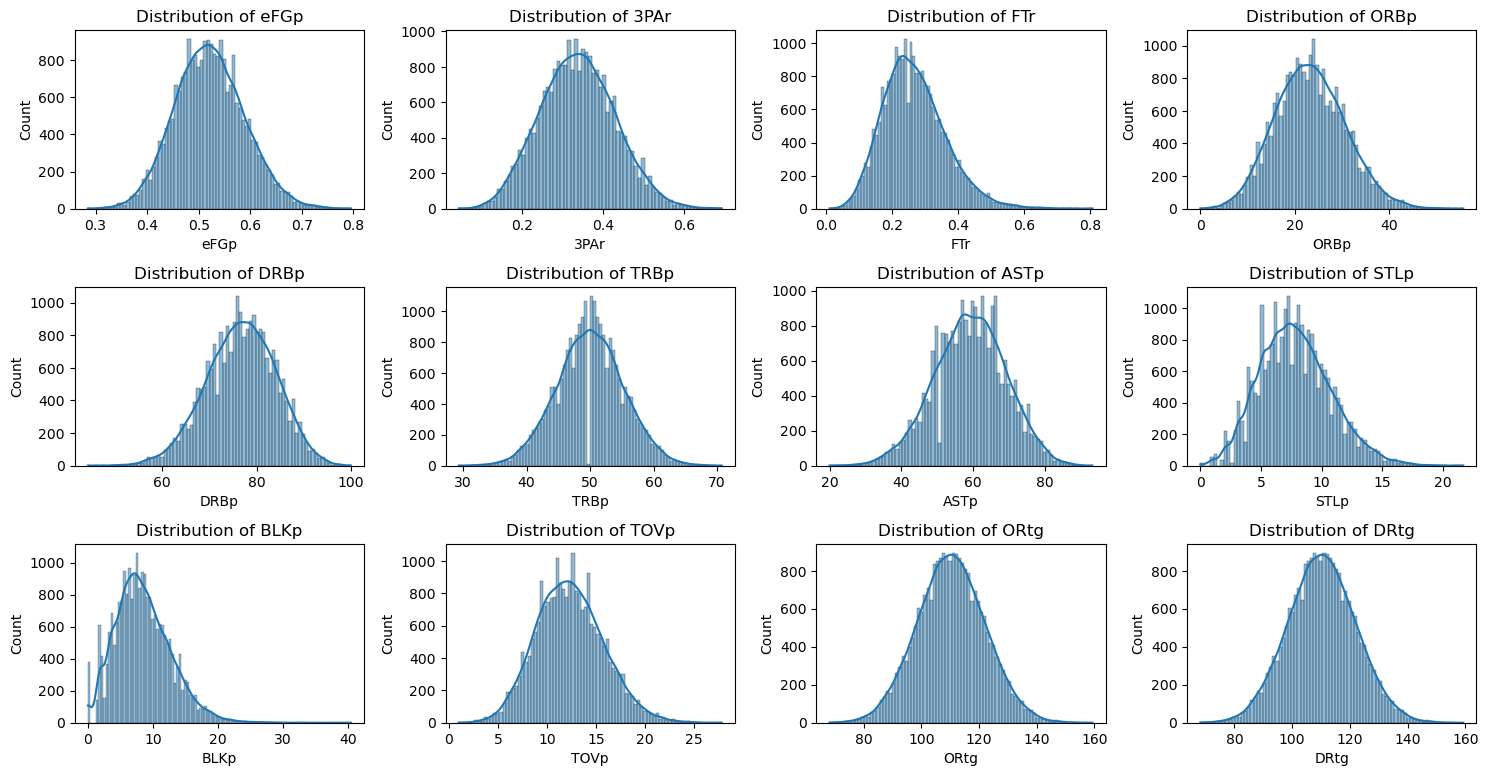

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting the distribution for each feature
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 4, i)
    sns.histplot(team_stats_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


With the data I have, it is logical to have this results are teams plays and performance may vary with each other. 

eFGp: The distribution is approximately normal with a slight skew to the right, indicating most teams cluster around a median eFGp.

3PAr : skewed to the left, this is understandable because teams would have different strategy with some teams not focusing on 3 points. 

FTr : The distribution is somewhat right-skewed, this make sense as most teams have a moderate free throws, and some with exceptionally high rates.

ORBp: The distribution shows a right skew, indicating that most teams have a lower offensive rebound percentage with fewer teams are good at this area.

DRBp: This feature has a left-skewed distribution, this is the same with ORBp but should be on the opposite side. meaning most teams have a high defensive rebound percentage, with fewer teams having a lower percentage.

TRBp : This distribution is roughly symmetric and centered around 50%. this is surprising but if we add ORBp and DRBp probably make sense. Reflecting that total rebounding is generally balanced across teams.

ASTp (Assist Percentage): The distribution is slightly right-skewed, with most teams having a moderate assist percentage, and fewer teams with very high assist percentages.

STLp (Steal Percentage): The distribution is right-skewed, indicating most teams have a moderate steal percentage, with fewer teams having very high steal percentages.

BLKp (Block Percentage): This distribution is right-skewed, showing that most teams have a lower block percentage, with some teams excelling in this area.

TOVp (Turnover Percentage): The distribution is somewhat right-skewed, with most teams having a moderate turnover percentage.

ORtg (Offensive Rating) and DRtg (Defensive Rating): Both have a normal distribution with a few outliers. The spread is wide, 
reflecting variability in team performance.


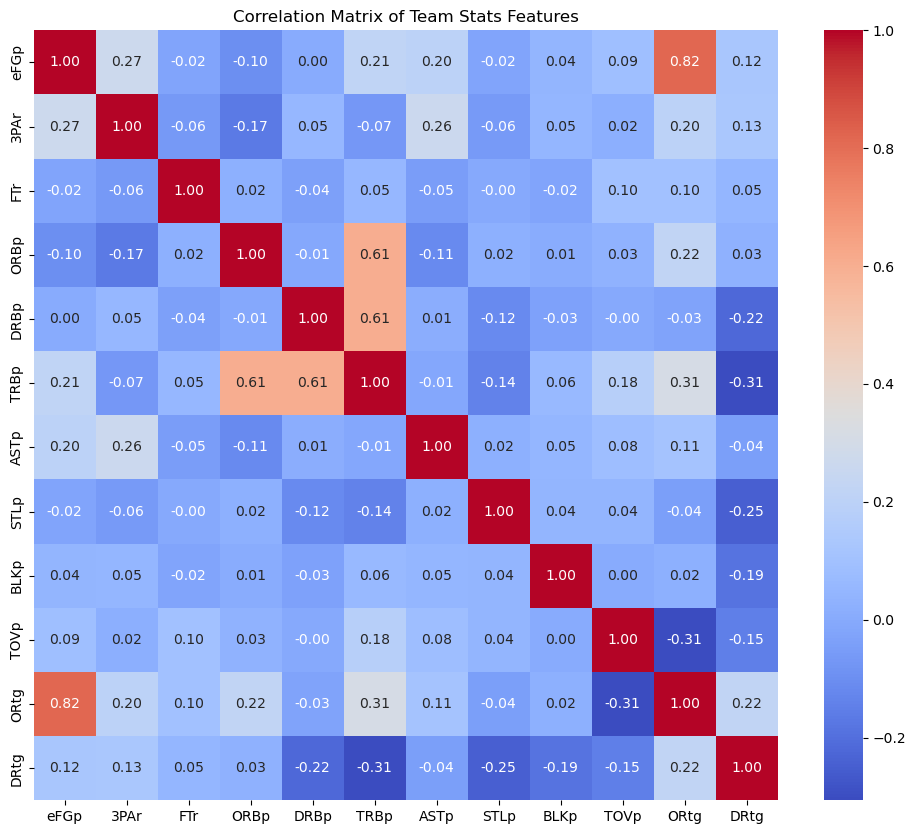

In [9]:
# Compute the correlation matrix
corr_matrix = team_stats_df[columns_of_interest].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title('Correlation Matrix of Team Stats Features')
plt.show()


Feature Relationships: understandable that correlations reveal strong relationships between certain features like ORBp, DRBp, and TRBp. And of course a correlation on shooting efficiency (eFGp) and turnovers (TOVp) on offensive and defensive ratings.